# Phân tích dữ liệu trên bộ dữ liệu FoodPrice in Turkey

In [1]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("FoodPrice_in_Turkey.csv")
df.head()


,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099


## Với mức ý nghĩa 5%, hãy kiểm định giả thuyết: giá bán lẻ gạo trung bình năm 2019 là 9.5 (Lira)/1 kg.

Lưu ý: Lira là đơn vị tiền tệ ở Turkey (1 usd ~ 8-9 Lira)

In [3]:
# ngưỡng của p_value = 0.05
# giá (Price) gạo (ProductName - "Rice-Retail") năm ("Year") 2019

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Place        7381 non-null   object 
 1   ProductId    7381 non-null   int64  
 2   ProductName  7381 non-null   object 
 3   UmId         7381 non-null   int64  
 4   UmName       7381 non-null   object 
 5   Month        7381 non-null   int64  
 6   Year         7381 non-null   int64  
 7   Price        7381 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 461.4+ KB


In [5]:
# lọc dữ liệu
price_rice = df[(df['ProductName'] == 'Rice - Retail') & (df['Year'] == 2019)].Price
price_rice

54       8.4275
55       8.7656
56       8.8101
57       8.9266
58       9.1866
59       9.2781
60       9.4634
61       9.4681
62       9.5000
63       9.4346
64       9.4267
65       9.5616
2657     8.0617
2658     8.4047
2659     8.4525
2660     8.4833
2661     8.5930
2662     8.6665
2663     8.8262
2664     8.5789
2665     8.6018
2666     8.5373
2667     8.6074
2668     8.9477
4239     8.8745
4240     9.2860
4241     9.3131
4242     9.3970
4243     9.7617
4244     9.8176
4245    10.1121
4246    10.1093
4247    10.1809
4248    10.1348
4249    10.1288
4250    10.2924
5822     9.1330
5823     9.4793
5824     9.5203
5825     9.7229
5826    10.0941
5827    10.2523
5828    10.3485
5829    10.3386
5830    10.4043
5831    10.1955
5832    10.2719
5833    10.2803
Name: Price, dtype: float64

In [6]:
# kiểm định giả thuyết: giá gạo trung bình có bằng 9.5 không
# H0: =9.5
# H1: khác 9.5

# stats: statistics
# ttest: 1 sample
stats.ttest_1samp(price_rice, 9.5)

TtestResult(statistic=-1.1854023812590566, pvalue=0.24181730968913567, df=47)

In [7]:
# 0.24 > 0.05
# không thể bác bỏ giả thuyết Không: =9.5
# không đủ chứng cứ để có thể bác bỏ giả thuyết rằng giá gạo = 9.5

## Kiểm định giả thuyết: Giá bột mỳ và giá gạo ở Turkey năm 2019 là bằng nhau

In [8]:
# tìm giá bột mỳ ở turkey năm 2019 "Wheat flour - Retail"
price_wheat = df[(df['ProductName'] == 'Wheat flour - Retail') & (df['Year'] == 2019)].Price
# tìm giá bột gạo ở turkey năm 2019
price_rice = df[(df['ProductName'] == 'Rice - Retail') & (df['Year'] == 2019)].Price

In [9]:
# H0: price_rice - price_wheat = 0
# H1: price_rice - price_wheat khác 0
stats.ttest_ind(price_rice, price_wheat, equal_var=False)

TtestResult(statistic=53.751692036304206, pvalue=7.110465285860583e-55, df=63.83639804430086)

In [12]:
# 0.00000000 ....711 < 0.05

In [ ]:
# Đủ bằng chứng để bác bỏ giả thuyết không
# Có thể kết luận giá bột mỳ và giá gạo ở Turkey năm 2019 là khác nhau

## Vẽ biểu đồ sự biến đổi giá gạo trung bình từ năm 1/2014 đến năm 1/2019

In [11]:
rice = df[df['ProductName'] == 'Rice - Retail']
df1 = rice.groupby('Year')['Price'].mean().reset_index()
df1

,Year,Price
0,2013,4.747700
1,2014,6.367855
2,2015,6.426833
3,2016,6.047500
4,2017,7.164792
5,2018,8.640444
6,2019,9.384565


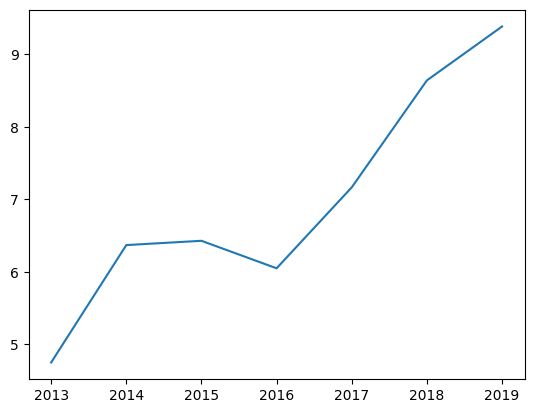

In [13]:
plt.plot(df1['Year'], df1['Price'])
plt.show()

#### Cách làm trên trang learn của codegym

C:\Users\Admin\AppData\Local\Temp\ipykernel_10856\1791114335.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['time'] =  pd.to_datetime(df['Year'].astype(str) + '/'+df['Month'].astype(str))


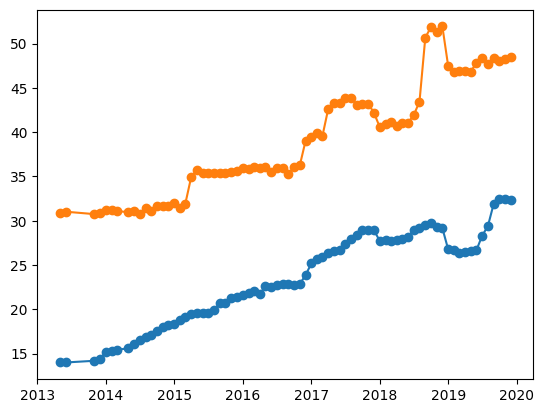

In [22]:
# chuyển đổi dữ liệu ngày tháng
df['time'] =  pd.to_datetime(df['Year'].astype(str) + '/'+df['Month'].astype(str))

# thực hiện tính toán và vẽ giá trà, caffe theo tháng
df_Tea_all = df.loc[(df.ProductName == 'Tea - Retail')]
df_Tea_all_mean_by_month = df_Tea_all.groupby('time')['Price'].mean()
plt.plot_date(df_Tea_all_mean_by_month.index, df_Tea_all_mean_by_month.values, linestyle ='solid')

df_Coffee_all = df.loc[(df.ProductName == 'Coffee - Retail')]
df_Coffee_all_mean_by_month = df_Coffee_all.groupby('time')['Price'].mean()
plt.plot_date(df_Coffee_all_mean_by_month.index, df_Coffee_all_mean_by_month.values, linestyle ='solid')


# Mình tự vẽ

In [26]:
# Lọc dữ liệu giá gạo từ tháng 1/2014 đến thg 1/2019
rice1 = df[(df['ProductName'] == 'Rice - Retail') & (df['Year'] != 2013 )]

df1_1 = rice1.groupby('Year')['Price'].mean().reset_index()
df1_1

,Year,Price
0,2014,6.367855
1,2015,6.426833
2,2016,6.047500
3,2017,7.164792
4,2018,8.640444
5,2019,9.384565


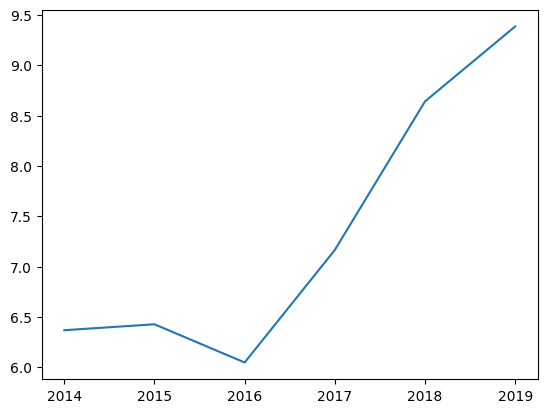

In [27]:
# Vẽ biểu đồ dựa vào df1_1
plt.plot(df1_1['Year'], df1_1['Price'])
plt.show()

## vẽ biểu đồ mô tả sự thay đổi của giá cà phê theo năm
## vẽ biểu mô tả sự thay đổi của giá trà theo năm

In [16]:
# Tính giá cà phê theo năm
# Lọc dữ liệu: coffee
df_coffee = df[df['ProductName'] == 'Coffee - Retail']

# tính giá coffee trung bình theo năm
df2 = df_coffee.groupby('Year')['Price'].mean().reset_index()
df2

,Year,Price
0,2013,30.890625
1,2014,31.261200
2,2015,34.499917
3,2016,36.154167
4,2017,42.082349
5,2018,44.706650
6,2019,47.646450


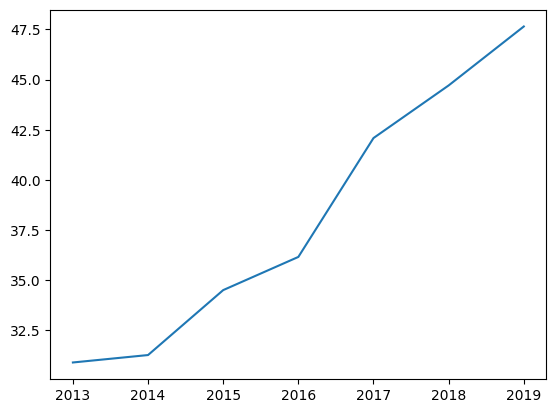

In [17]:
# Vẽ biểu đồ dựa vào df2
plt.plot(df2['Year'], df2['Price'])
plt.show()

In [18]:
# Tính giá trà theo năm
# Lọc dữ liệu: tea
df_tea = df[df['ProductName'] == 'Tea - Retail']

# tính giá coffee trung bình theo năm
df3 = df_tea.groupby('Year')['Price'].mean().reset_index()
df3


,Year,Price
0,2013,14.152900
1,2014,16.543309
2,2015,19.870750
3,2016,22.537500
4,2017,27.112123
5,2018,28.601408
6,2019,28.860771


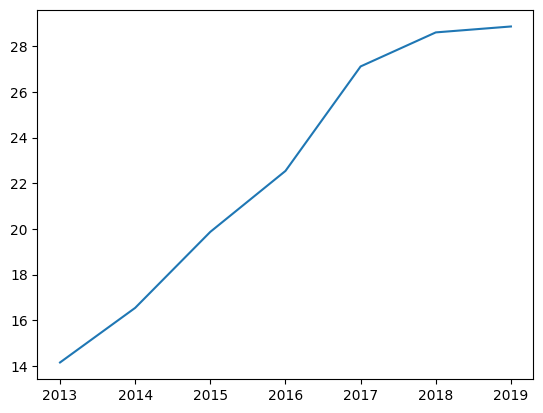

In [19]:
# Vẽ biểu đồ dựa vào df3
plt.plot(df3['Year'], df3['Price'])
plt.show()

### biến đổi dữ liệu: Để tiến hành so sánh được giá trà và giá caphe có chênh nhau không, chúng ta cần so sánh sự khác biệt giữa giá trà và giá cà phê theo cùng thời gian và địa điểm

In [29]:
df

,Place,ProductId,ProductName,UmId,UmName,Month,Year,Price,time
0,National Average,52,Rice - Retail,5,KG,5,2013,4.4920,2013-05-01
1,National Average,52,Rice - Retail,5,KG,6,2013,4.5786,2013-06-01
2,National Average,52,Rice - Retail,5,KG,11,2013,4.7865,2013-11-01
3,National Average,52,Rice - Retail,5,KG,12,2013,5.1337,2013-12-01
4,National Average,52,Rice - Retail,5,KG,1,2014,5.5099,2014-01-01
...,...,...,...,...,...,...,...,...,...
7376,Izmir,502,Cocoa (powder) - Retail,5,KG,8,2019,47.9040,2019-08-01
7377,Izmir,502,Cocoa (powder) - Retail,5,KG,9,2019,49.1176,2019-09-01
7378,Izmir,502,Cocoa (powder) - Retail,5,KG,10,2019,50.8347,2019-10-01
7379,Izmir,502,Cocoa (powder) - Retail,5,KG,11,2019,51.7985,2019-11-01


In [30]:
# Tiền xử lý dữ liệu
# Tạo một data frame thông tin gồm chứa time - place, giá trà, giá cafe
df_tea_and_coffee = df.loc[(df.ProductName.isin(['Tea - Retail','Coffee - Retail']))]

df_tea_and_coffee['time-place'] = df_tea_and_coffee['time'].astype(str) +'-'+df_tea_and_coffee['Place']
df4 = df_tea_and_coffee[df_tea_and_coffee.ProductName =='Tea - Retail'].filter(['time-place',  'Price'])
df4 = df4.rename(columns = {'Price':'Tea - Retail'})

df5 = df_tea_and_coffee[df_tea_and_coffee.ProductName =='Coffee - Retail'].filter(['time-place', 'Price'])
df5 = df5.rename(columns = {'Price':'Coffee - Retail'})

Processed_data = pd.merge(df4, df5, on = 'time-place')
Processed_data.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_10856\1530606937.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tea_and_coffee['time-place'] = df_tea_and_coffee['time'].astype(str) +'-'+df_tea_and_coffee['Place']


,time-place,Tea - Retail,Coffee - Retail
0,2013-05-01-National Average,14.0201,30.8937
1,2013-06-01-National Average,14.0003,31.0164
2,2013-11-01-National Average,14.1921,30.7445
3,2013-12-01-National Average,14.3991,30.9079
4,2014-01-01-National Average,15.2072,31.2607


#### Tiến hành kiểm định: Thực hiện kiểm định wilcoxon 1 phía với giả thuyết như sau
Giả thuyết không: giá cà phê bằng giá trà công thêm 15 Lira ở mọi thời điểm

Giả thuyết đối: Giá giá cà phê luôn hơn giá trà 15 Lira ở mọi thời điểm

In [31]:
# thực hiện biến đổi dữ liệu
d = Processed_data['Coffee - Retail']-Processed_data['Tea - Retail'] - 15

# Thực hiện kiểm định wilcolxon
from scipy import stats
# thực hiện kiểm định với giả thuyết đối được định nghĩa ở trên
stats.wilcoxon(d, alternative='greater')

WilcoxonResult(statistic=9838.0, pvalue=0.0004122034397612688)

Do pvalue <1% rất nhiều –> Bác bỏ giả thuyết không, chấp nhận giả thuyết đối Giá Cà phê luôn lớn hơn giá trà ít nhất 15 lira mà không bị ảnh hưởng bởi thời gian hay địa điểm